<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/06_3_Principal_componenet_Analysis_Algorythm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-02-09 08:58:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-09 08:58:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-09 08:58:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)    # 주성분의 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape)
# pca.components_ 배열의 첫 번째 차원이 50, 즉 50개의 주성분(차원)을 찾았으며, 그 차원은 원본 데이터셋의 특성 개수와 같은 10,000을 가짐

(50, 10000)


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

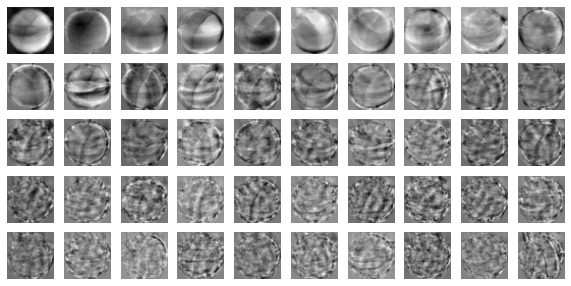

In [10]:
# 원본 데이터와 차원이 같으므로 주성분을 100 X 100 크기의 이미지로 출력할 수 있음
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 차원 축소를 통해 10,000개의 특성을 50개로 줄일 수 있음을 의미

In [11]:
print(fruits_2d.shape)

(300, 10000)


In [14]:
# transform() 메소드를 통해 차원 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [15]:
# inverse_transform() 메소드를 통해 특성 복원이 가능
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


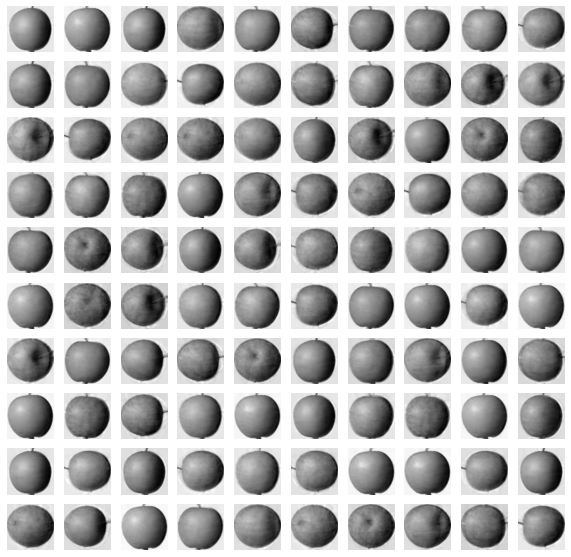

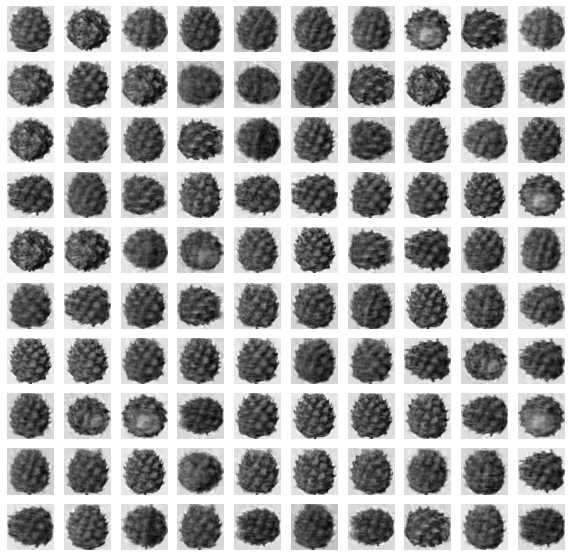

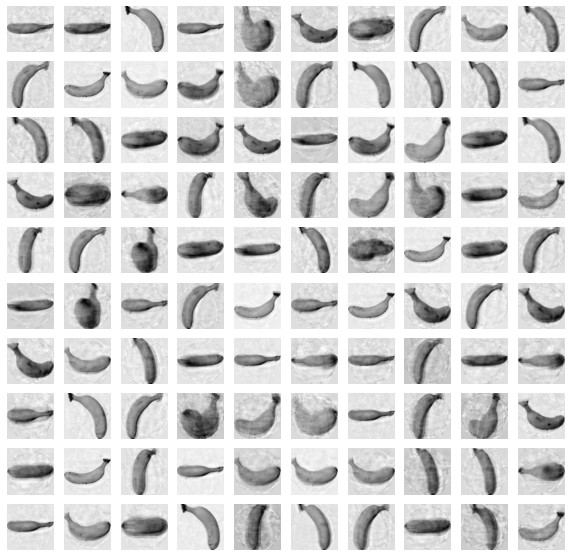

In [16]:
# 100 X 100 크기로 바꾸어 100개씩 나누어 출력하면,
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

# 설명된 분산
  주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [19]:
# PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음
print(np.sum(pca.explained_variance_ratio_))

0.9215109323909492


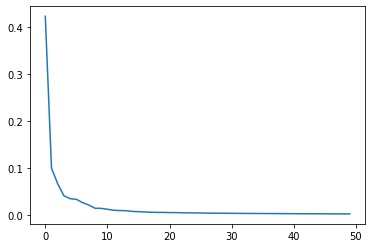

In [20]:
# 이를 그래프로 그리면,
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 다른 알고리즘과 함께 사용하기

## 로지스틱 회귀 모델

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [22]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [23]:
# 로지스틱 회귀모델에서의 성능을 가늠하기 위해 교차검증 수행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1455033779144288


In [25]:
# PCA로 축소한 fruits_pca를 사용했을 때와 비교하면,
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 50개의 특성을 사용하고도 높은 정확도와 훈련시간도 감소

1.0
0.023669719696044922


In [27]:
# n_components 매개변수에 주성분의 개수를 지정하는 대신 설명된 분산의 비율을 입력할 수도 있음
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
# 설명된 분산의 50%에 달하는 주성분을 찾을 때까지 자동으로 반복됨

PCA(n_components=0.5)

In [28]:
print(pca.n_components_)
# 2개 만으로 원본 데이터에 있는 분산의 50%를 나타낼 수 있음

2


In [29]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [31]:
# 이를 교차검증 하면,
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 2개 특성만으로 99% 정확도를 나타냄

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.060357856750488284


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-평균 알고리즘

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


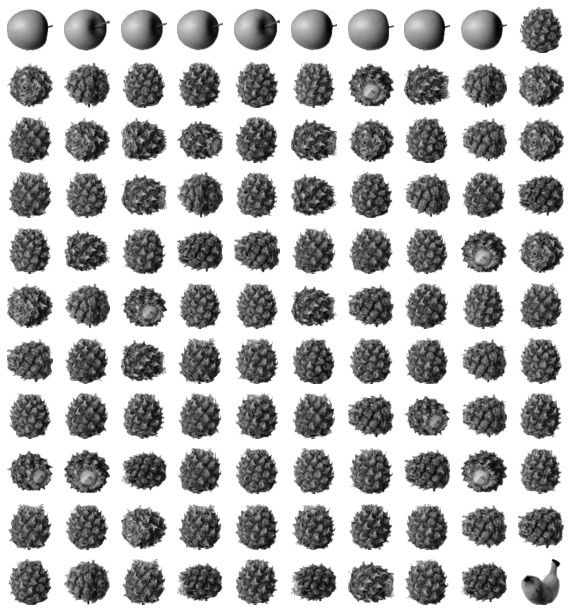

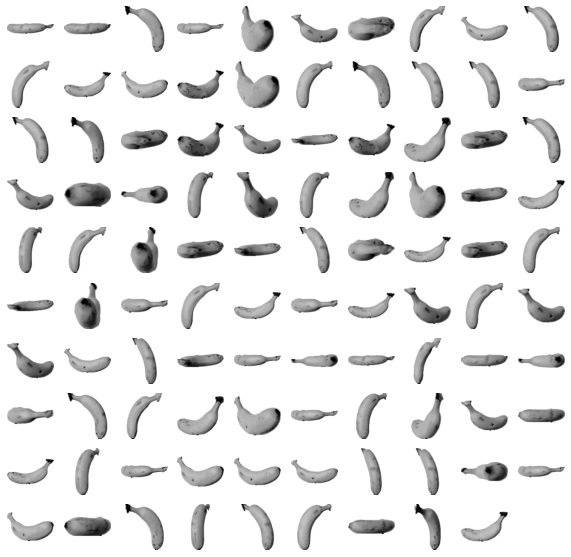

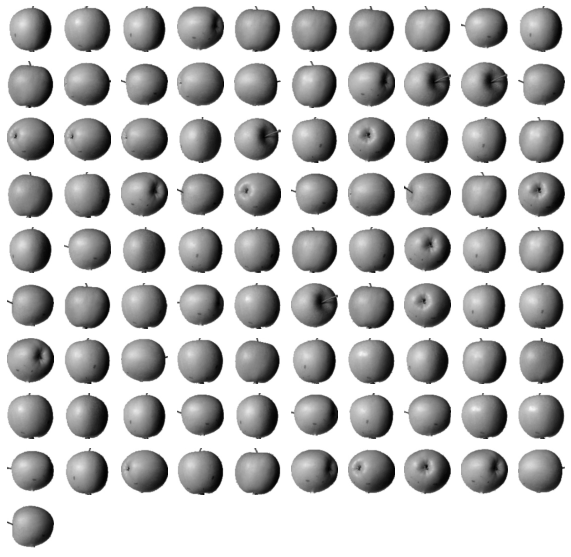

In [33]:
# 이미지를 출력하면,
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

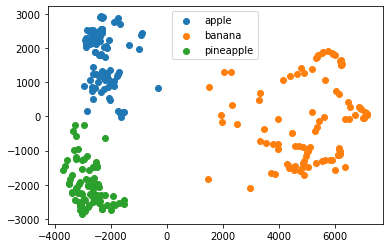

In [35]:
# km.labels_를 사용해 클러스터별 산점도를 그리면,
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 전체 소스코드

# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-15 00:57:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-15 00:57:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-15 00:57:20--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

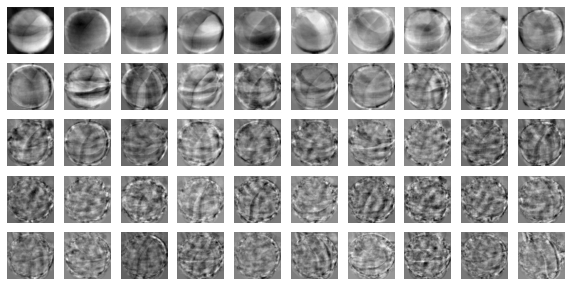

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)

In [ ]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

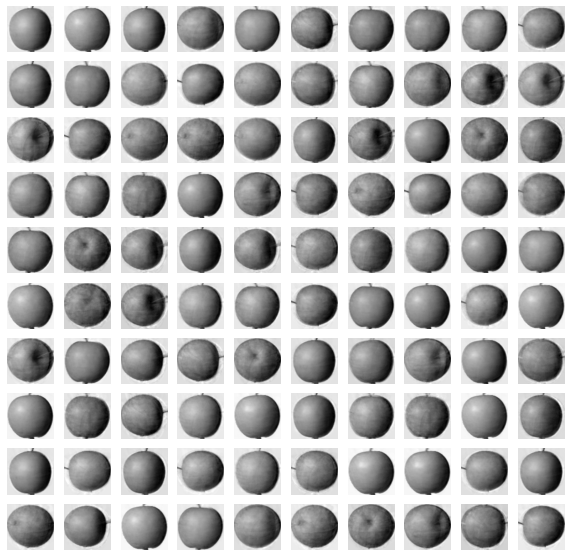

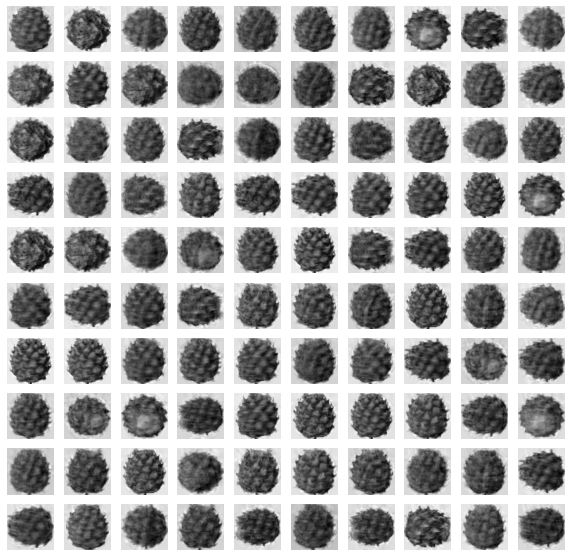

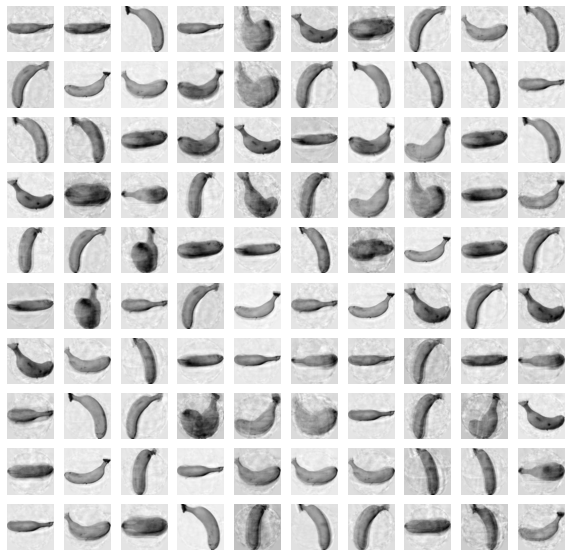

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215808173798626


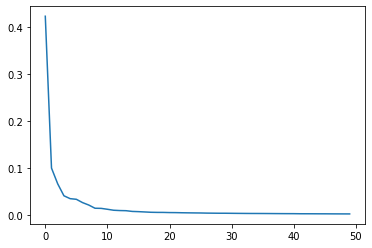

In [ ]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1039844512939454


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.021912097930908203


In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.034157419204711915


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


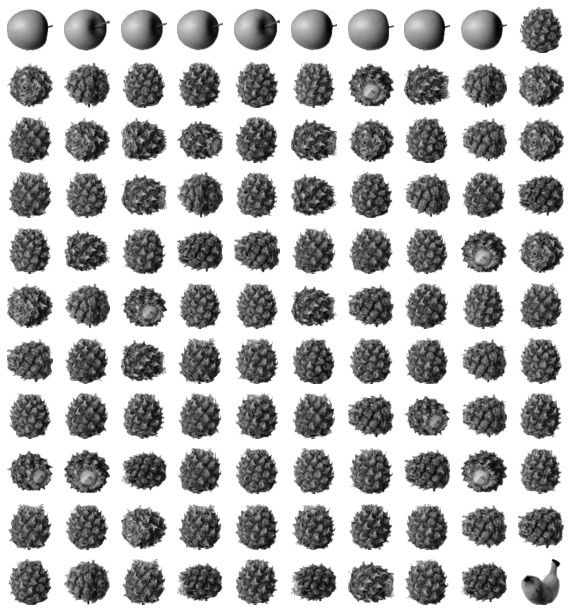

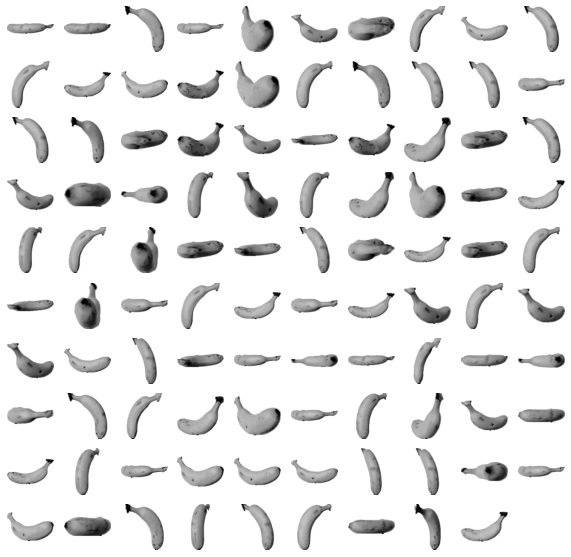

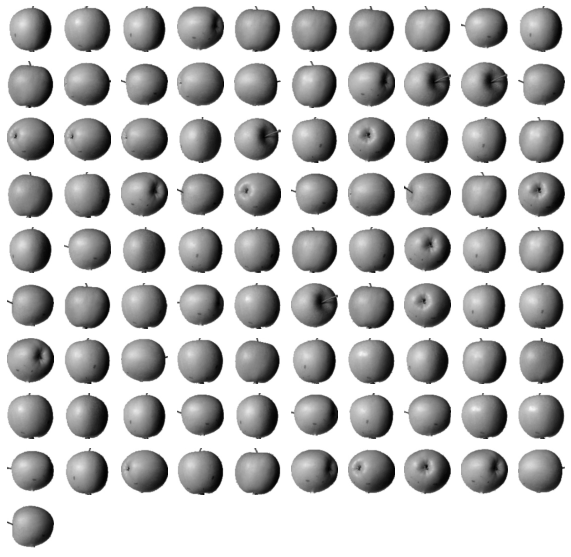

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

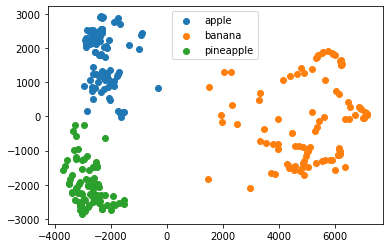

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 총 정리
  ## 키워드
  ### 차원축소
        원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 종, 저장 공간의 절약과 시각화의 장점이 있음, 다른 알고리즘의 성능 향상에 좋음

  ### 주성분 분석
        차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법, 이 방향을 주성분이라 부름
        원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있음, 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작음

  ### 설명된 분산
        주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지를 기록한 것

  
  ## 핵심 패키지와 함수
  ## 사이킷런
  ### PCA
        주성분 분석을 수행하는 클래스
        n_components는 주성분의 개수를 지정, 디폴트는 None으로 샘플 개수와 특성 개수 중 작은 것의 값을 사용
        random_state에서 넘파이 난수 시드 값을 지정 가능
        components_ 속성에는 훈련 세트에서 찾은 주성분이 저장
        explained_cariance_ 속성에는 설명된 분산이 저장
        explained_variance_ratio에 설명된 분산의 비율이 저장
        inverse_transform() 메소드는 transform() 메소드로 차원 축소한 데이터를 다시 원본 차원으로 복원함



  # 팁
      1. 주성분의 개수를 명시적으로 지정하는 대신 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.
      ex) 
      pca = PCA(n_components=0.5)
      pca.fit(fruits_2d)

      2. 차원 축소를 통해 클러스터별 산점도를 그리는 등의 시각화에 도움을 줄 수 있다.

      3. 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어든다.

      4. 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.
      ex)
      원본 데이터 셋 (1000,100)을 10개의 주성분을 찾아 차원축소하면, 변환된 데이터 셋은 (1000,10)이다.